# Clase 14 - 4/10/2018
(x emilopez)

- Ejercicio de la página 42 del apunte ``05.pdf``
- En dropbox ``Estadistica.Aplicada.2018/02_Disenio_Factorial_y_bloques``
- Tenemos 2 factores
- Usamos el archivo ``horti.csv``

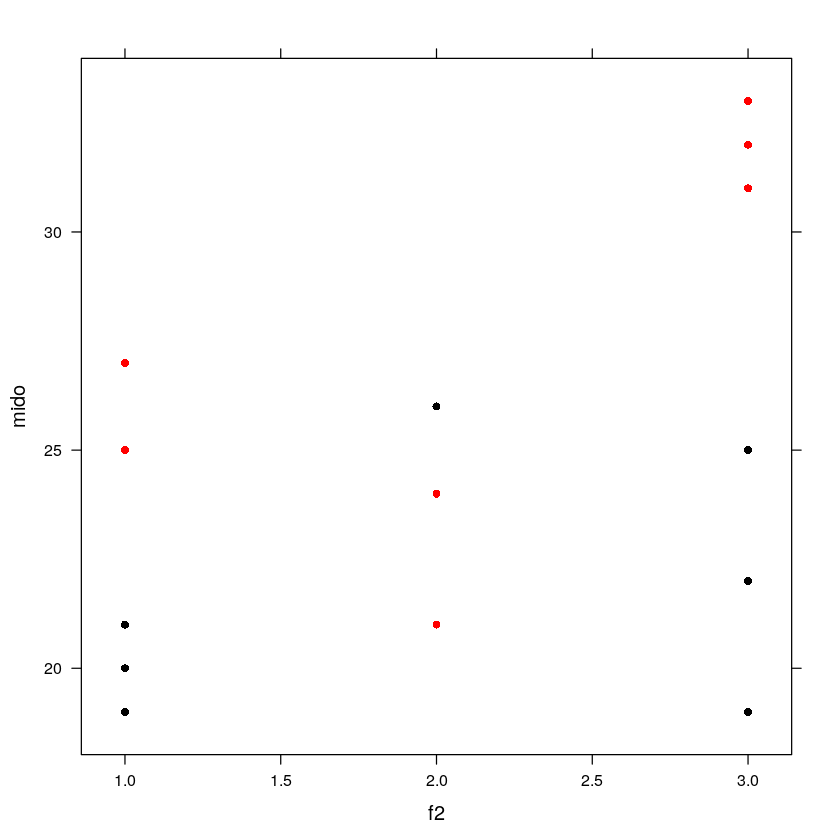

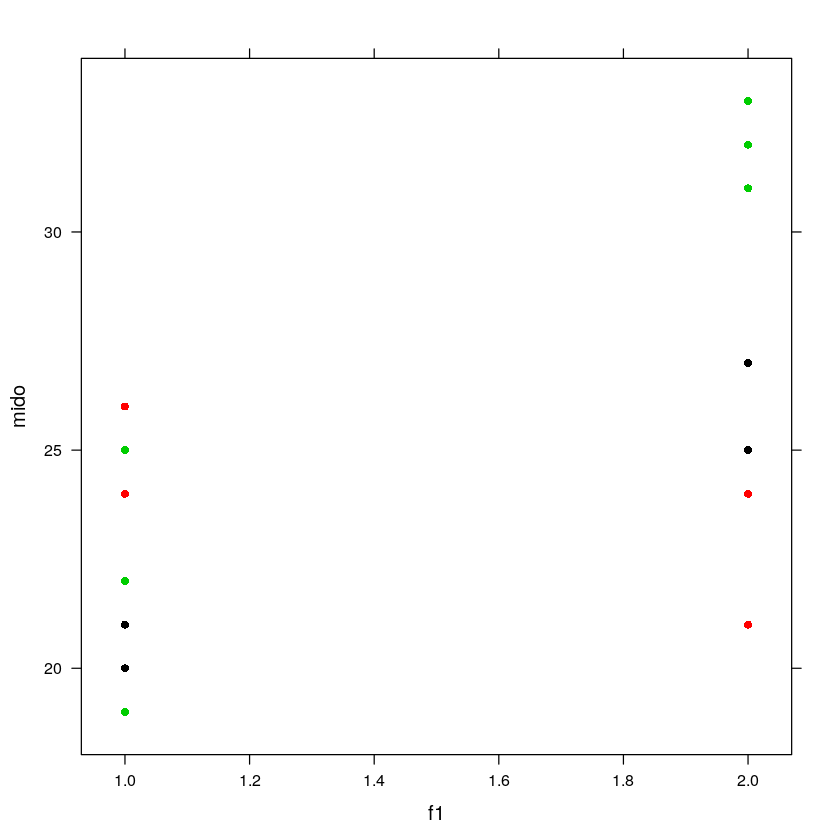

In [1]:
# Ejercicio de la pag. 42/90
datos = read.table("/home/emiliano/EstadisticaAplicada/Estadistica.Aplicada.2018/02_disenio_factorial_y_bloques/datos/horti.csv", header=TRUE, sep=',')
attach(datos)
fa1 = as.factor(f1)
fa2 = as.factor(f2)

library(lattice)
fig1 = xyplot(mido ~f2, pch = 16, col = as.factor(f1))
print(fig1)

fig2 = xyplot(mido ~f1, pch = 16, col = as.factor(f2))
print(fig2)

**Pasos a seguir:**
- Gráficos de interacción
- ANOVA
- Análisis de residuos
    - Si nos da satisfactorio, seguimos
    - Si no, deberíamos hacer alguna *transformación*

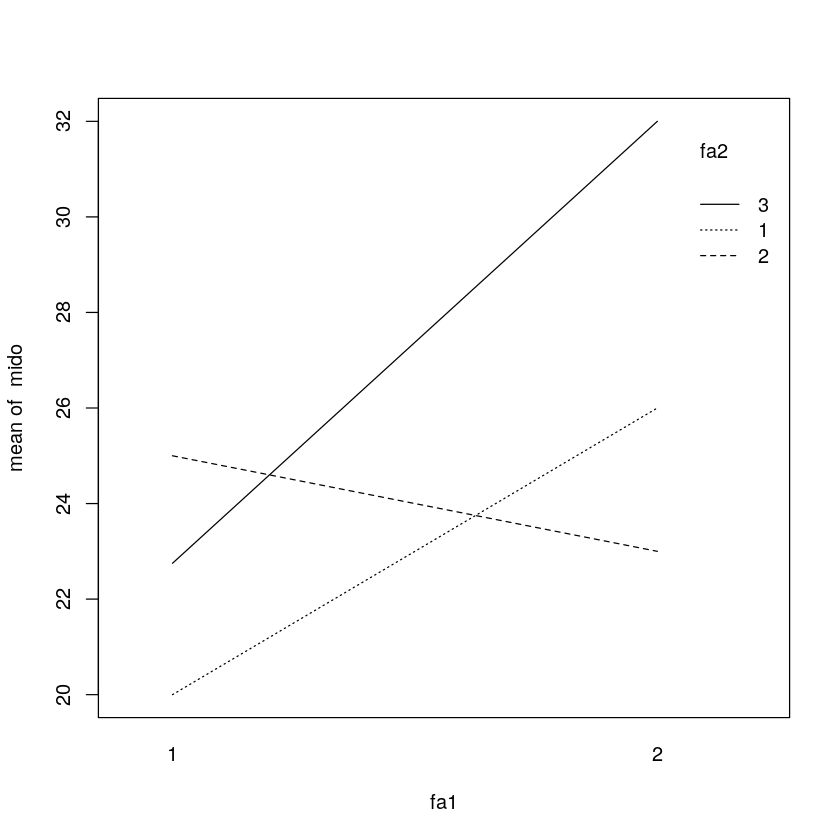

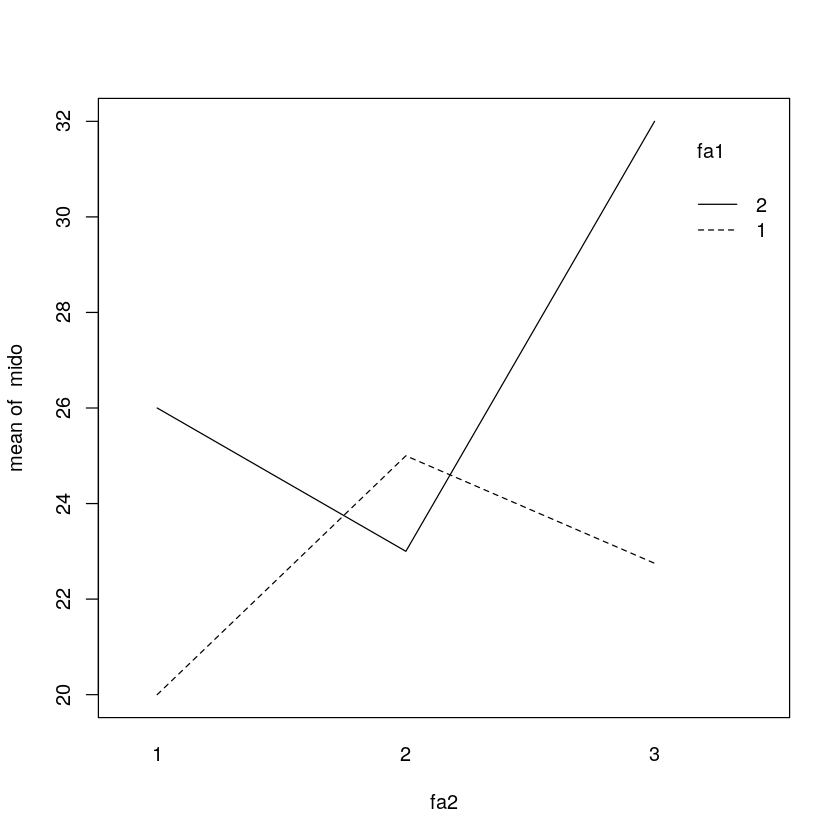

In [2]:
# graficos de interaccion
interaction.plot(fa1, fa2, mido)
interaction.plot(fa2, fa1, mido)

In [3]:
# modelo, vemos que la interaccion nos da significativa porque fa1:fa2 nos da un p valor chico
model = aov(mido~fa1*fa2)
summary(model)

            Df Sum Sq Mean Sq F value   Pr(>F)    
fa1          1 128.00  128.00   39.64 3.97e-05 ***
fa2          2  81.51   40.75   12.62 0.001119 ** 
fa1:fa2      2  95.74   47.87   14.82 0.000572 ***
Residuals   12  38.75    3.23                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  model$residuals
W = 0.92408, p-value = 0.1527


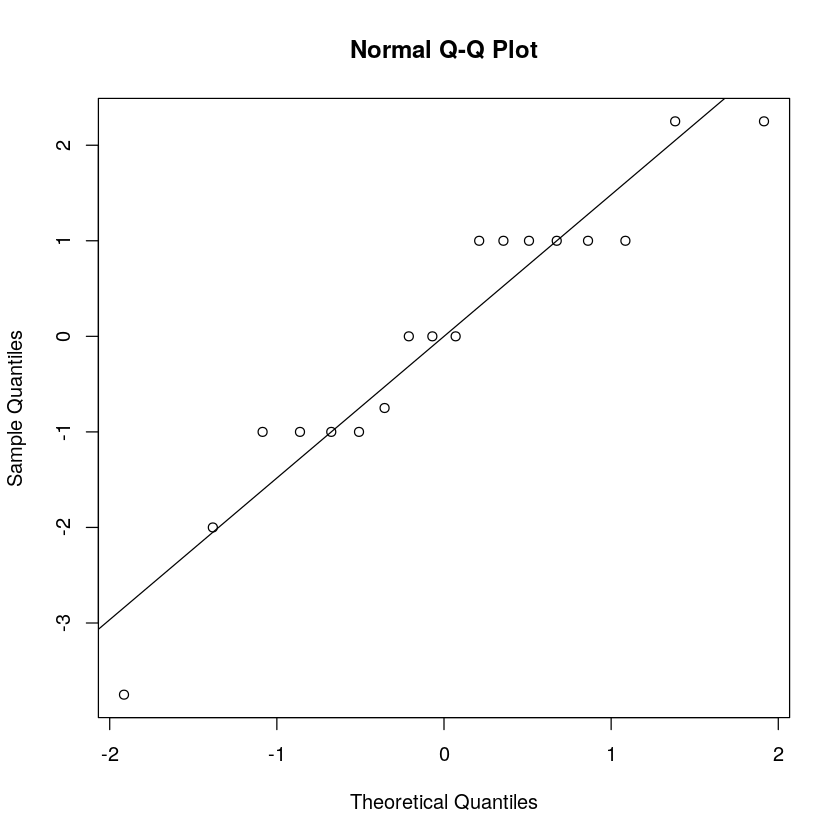

In [4]:
# fitea bien los datos? 
# veamos los residuos
# Normalidad
qqnorm(model$residuals)
qqline(model$residuals)
# no tenemos evidencia fuerte en contra de la normalidad, pero ojo, pq tenemos poca potencia
shapiro.test(model$residuals)

In [6]:
# vemos varianza constante
library(car)
leveneTest(model)
#outLierTest(model)

,Df,F value,Pr(>F)
group,5,1.225434,0.3556694
,12,NA,NA


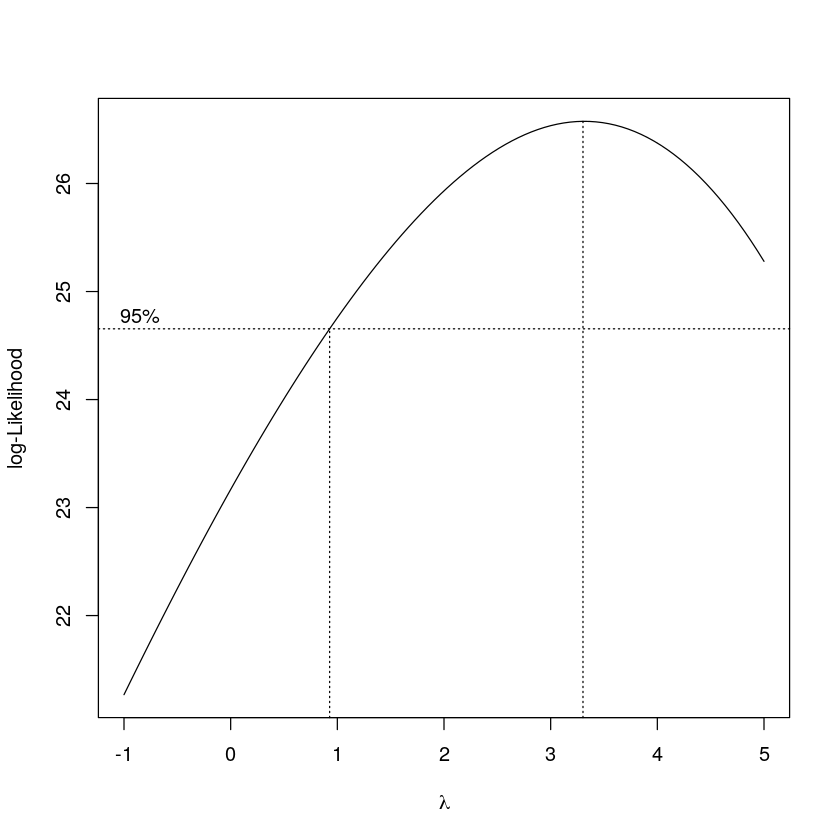

In [7]:
# transformacion?? parece que conviene transformar, nos queda 1 dentro del intervalo, asi que no transformamos
library(MASS)
boxcox(model, lambda = seq(-1, 5, length(20)))

# podriamos haber llegado a lo mismo con anova, para ver el mismo pvalor anova(modelo_red, modelo_full)
# model_red = aov(mido~fa1+fa2)
# anova(model_red, model)

 fa1 fa2 lsmean        SE df lower.CL upper.CL
 1   1    20.00 1.0374916 12 17.73950 22.26050
 2   1    26.00 1.2706626 12 23.23146 28.76854
 1   2    25.00 1.2706626 12 22.23146 27.76854
 2   2    23.00 1.0374916 12 20.73950 25.26050
 1   3    22.75 0.8984941 12 20.79235 24.70765
 2   3    32.00 0.8984941 12 30.04235 33.95765

Confidence level used: 0.95 

 fa1 fa2 lsmean        SE df lower.CL upper.CL
 1   1    20.00 1.0374916 12 17.73950 22.26050
 2   1    26.00 1.2706626 12 23.23146 28.76854
 1   2    25.00 1.2706626 12 22.23146 27.76854
 2   2    23.00 1.0374916 12 20.73950 25.26050
 1   3    22.75 0.8984941 12 20.79235 24.70765
 2   3    32.00 0.8984941 12 30.04235 33.95765

Confidence level used: 0.95 


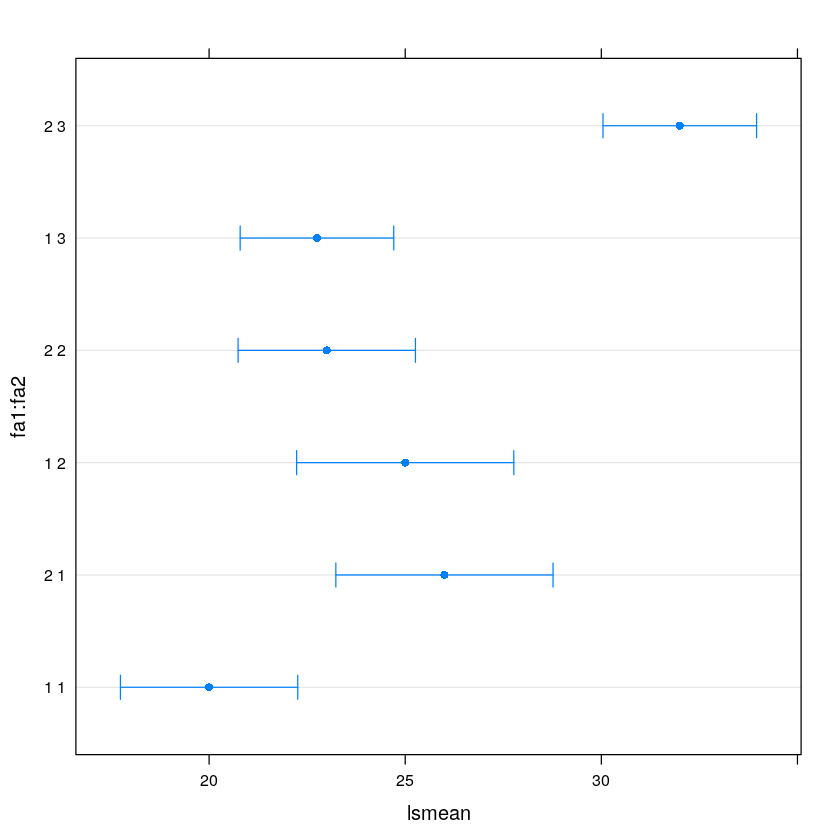

In [9]:
# cualquier analisis siguiente que tengamos que hacer lo vamos a hacer con la interaccion
# si queremos las medias por grupo, x ej, debemos hacer un IC para esa media
# o sea, esto nos sirve para encontrar estimadores de las medias

library(lsmeans)
lsmeans(model, ~fa1*fa2)
plot(lsmeans(model, ~fa1*fa2))
print(lsmeans(model, ~fa1*fa2))
# el primer caso es el fungicida 2 con la dosis 3

In [10]:
# como la interaccion es importante deberia crear una nueva variable
# esto es para poder llamar a multcomp para comparar contra el mejor
datos$interaccion = factor(paste(f1, f2))
attach(datos)
m2 = aov(mido~interaccion, data=datos)
summary(m2)
# el estimador de la varianza es 3.23 con 12 grados de libertad

The following objects are masked from datos (pos = 8):

    f1, f2, mido



            Df Sum Sq Mean Sq F value   Pr(>F)    
interaccion  5 305.25   61.05   18.91 2.57e-05 ***
Residuals   12  38.75    3.23                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [11]:
# Ahora hacemos la comparacion con el MEJOR, pero OJO, NO PODEMOS USARLO PORQUE NO TENEMOS LA MISMA
# ENTONCES NO LO PODEMOS USAR AL FINAL PORQUE ES DESBALANCEADO, el profe se dio cuenta que no lo podiamos usar por eso
source("/home/emiliano/EstadisticaAplicada/practica/mymultcomp.R")
maxHSU(mido, interaccion, alpha=0.05, 3.23,12)

[1] "WARNING: esta funcion considera que todos los ni son iguales"
[1] "2 3"


[1] NA    "2 3"

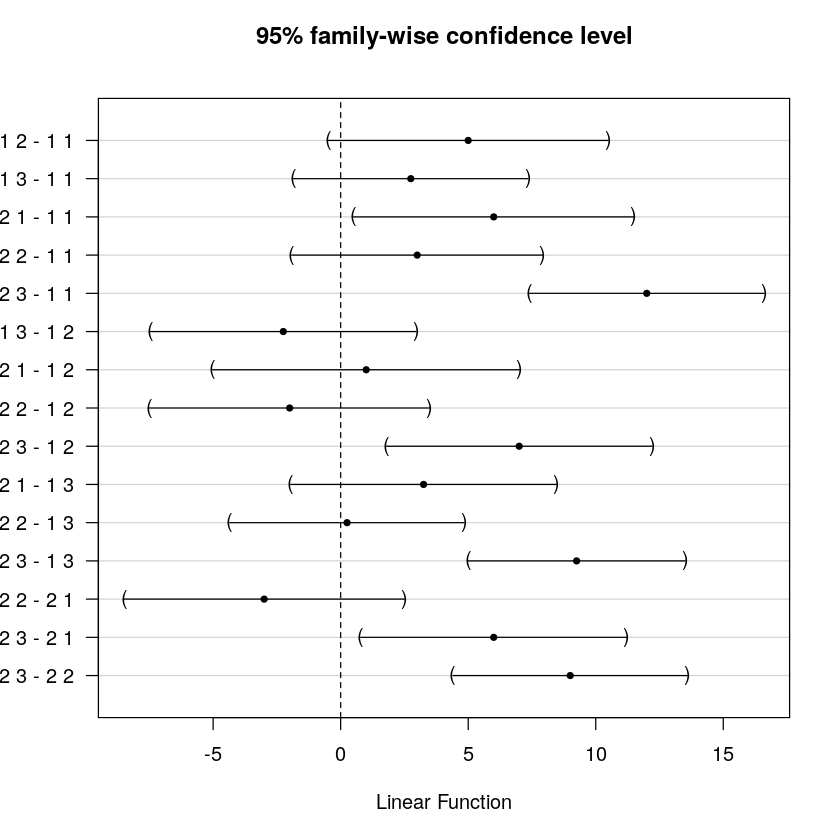

In [14]:
# si podemos usar tukey para comparaciones multiples
library(multcomp)
mc = glht(m2, linfct=mcp(interaccion="Tukey"))
plot(mc)
# vemos los intervalos teniendo en cuenta si incluyen o no el 0

In [ ]:
# vemos que las combinaciones que no contienen el 0 son significativamente distintas
# en el eje y, tenemos para el 1er caso x ej, (factor 1 es la dosis y el segundo es el fungicida), 
# dosis 1 con fungicida 2, y dosis 1 con fungicida 1
# como la interaccion es significativa, no lo podes analizar al fungicida sin considerar la dosis